In [175]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

### Q1

In [116]:
df1 = pd.read_csv('page-blocks_csv.csv')

In [117]:
df1.head()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [118]:
df1.shape

(5473, 11)

In [119]:
df1.describe()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


In [120]:
df1['class'].value_counts()

class
1    4913
2     329
5     115
4      88
3      28
Name: count, dtype: int64

In [121]:
X = df1.drop('class', axis = 1)
Y = df1['class']

In [122]:
X

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4
...,...,...,...,...,...,...,...,...,...,...
5468,4,524,2096,131.000,0.542,0.603,40.57,1136,1264,28
5469,7,4,28,0.571,0.714,0.929,10.00,20,26,2
5470,6,95,570,15.833,0.300,0.911,1.64,171,519,104
5471,7,41,287,5.857,0.213,0.801,1.36,61,230,45


In [123]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5468    2
5469    1
5470    1
5471    1
5472    4
Name: class, Length: 5473, dtype: int64

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [125]:

DT = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.015)
ModelDT = DT.fit(x_train, y_train)
predictionDT = DT.predict(x_test)

In [126]:

print(f"training accuracy with gini and pruning on dataset 1 -> {DT.score(x_train, y_train)*100} %")

training accuracy with gini and pruning on dataset 1 -> 95.04339881224303 %


In [127]:
print(f"testing accuracy with gini and pruning on dataset 1 -> {accuracy_score(y_test, predictionDT)*100} %")

testing accuracy with gini and pruning on dataset 1 -> 94.52054794520548 %


In [128]:
DT = DecisionTreeClassifier(criterion = 'gini')
ModelDT = DT.fit(x_train, y_train)
predictionDT = DT.predict(x_test)

In [129]:
print(f"training accuracy with gini and no pruning on dataset 1 -> {DT.score(x_train, y_train)*100} %")

training accuracy with gini and no pruning on dataset 1 -> 99.7944266788488 %


In [130]:
print(f"testing accuracy with gini and no pruning on dataset 1 -> {accuracy_score(y_test, predictionDT)*100} %")

testing accuracy with gini and no pruning on dataset 1 -> 95.98173515981735 %


In [131]:
DT = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.015)
ModelDT = DT.fit(x_train, y_train)
predictionDT = DT.predict(x_test)

In [132]:
print(f"training accuracy with entropy and pruning on dataset 1 -> {DT.score(x_train, y_train)*100} %")

training accuracy with entropy and pruning on dataset 1 -> 96.00274097761535 %


In [133]:
print(f"testing accuracy with entropy and pruning on dataset 1 -> {accuracy_score(y_test, predictionDT)*100} %")

testing accuracy with entropy and pruning on dataset 1 -> 95.4337899543379 %


In [134]:
DT = DecisionTreeClassifier(criterion = 'entropy')
ModelDT = DT.fit(x_train, y_train)
predictionDT = DT.predict(x_test)

In [135]:
print(f"training accuracy with entropy and no pruning on dataset 1 -> {DT.score(x_train, y_train)*100} %")

training accuracy with entropy and no pruning on dataset 1 -> 99.7944266788488 %


In [136]:
print(f"testing accuracy with entropy and no pruning on dataset 1 -> {accuracy_score(y_test, predictionDT)*100} %") 

testing accuracy with entropy and no pruning on dataset 1 -> 96.34703196347031 %


In [137]:
df2 = pd.read_csv('adult.csv')
df2.shape

(48842, 15)

In [138]:
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['education'] = le.fit_transform(df2['education'])
#using label encoding since order matters here 
df2 = pd.get_dummies(df2, drop_first = True)

In [140]:
df2

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,1,7,0,0,40,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,11,9,0,0,50,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,7,12,0,0,40,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,15,10,7688,0,40,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,15,10,0,0,30,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,7,12,0,0,38,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48838,40,154374,11,9,0,0,40,False,False,False,...,False,False,False,False,False,False,True,False,False,True
48839,58,151910,11,9,0,0,40,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48840,22,201490,11,9,0,0,20,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [142]:
X = df2.drop('income_>50K', axis = 1)
Y = df2['income_>50K']

In [143]:
X

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,1,7,0,0,40,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,11,9,0,0,50,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,7,12,0,0,40,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,15,10,7688,0,40,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,15,10,0,0,30,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,7,12,0,0,38,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,11,9,0,0,40,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,11,9,0,0,40,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,11,9,0,0,20,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [144]:
Y

0        False
1        False
2         True
3         True
4        False
         ...  
48837    False
48838     True
48839    False
48840    False
48841     True
Name: income_>50K, Length: 48842, dtype: bool

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.2, random_state = 33)

In [157]:
DT = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.015)
ModelDT = DT.fit(x_train, y_train)
predictionDT = DT.predict(x_test)

In [158]:
print(f"training accuracy with gini and pruning of dataset 2 -> {DT.score(x_train, y_train)*100} %")

training accuracy with gini and pruning of dataset 2 -> 83.17977067977068 %


In [159]:
print(f"testing accuracy with gini and pruning of dataset 2 -> {accuracy_score(y_test, predictionDT)*100} %")

testing accuracy with gini and pruning of dataset 2 -> 82.84792956953473 %


In [166]:
DT = DecisionTreeClassifier(criterion = 'gini')
ModelDT = DT.fit(x_train, y_train)
predictionDT = DT.predict(x_test)

In [161]:
print(f"training accuracy with gini and no pruning of dataset 2 -> {DT.score(x_train, y_train)*100} %")

training accuracy with gini and no pruning of dataset 2 -> 100.0 %


In [167]:
print(f"testing accuracy with gini and no pruning of dataset 2 -> {accuracy_score(y_test, predictionDT)*100} %")

testing accuracy with gini and no pruning of dataset 2 -> 81.10508266366382 %


In [178]:
DT = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.015)
ModelDT = DT.fit(x_train, y_train)
predictionDT = DT.predict(x_test)

In [169]:
print(f"training accuracy with entropy and pruning of dataset 2 -> {DT.score(x_train, y_train)*100} %")

training accuracy with entropy and pruning of dataset 2 -> 84.62325962325963 %


In [170]:
print(f"testing accuracy with entropy and pruning of dataset 2 -> {accuracy_score(y_test, predictionDT)*100} %")

testing accuracy with entropy and pruning of dataset 2 -> 84.23504120386957 %


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

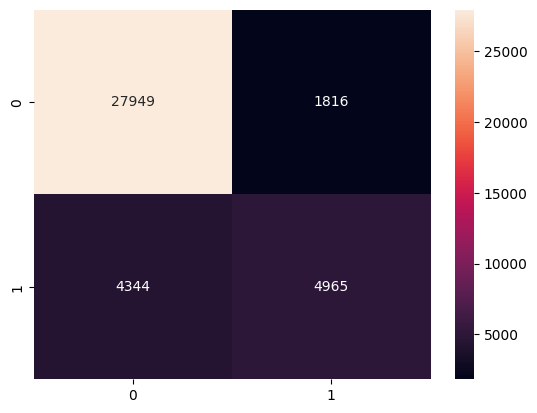

<Figure size 800x600 with 0 Axes>

In [181]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictionDT)
sns.heatmap(cm, annot = True, fmt = 'd')

plt.figure(figsize = (8,6))
plt.xlabel

In [171]:
DT = DecisionTreeClassifier(criterion = 'entropy')
ModelDT = DT.fit(x_train, y_train)
predictionDT = DT.predict(x_test)

In [172]:
print(f"training accuracy with entropy and no pruning of dataset 2 -> {DT.score(x_train, y_train)*100} %")

training accuracy with entropy and no pruning of dataset 2 -> 100.0 %


In [173]:
print(f"testing accuracy with entropy and no pruning of dataset 2 -> {accuracy_score(y_test, predictionDT)*100} %")

testing accuracy with entropy and no pruning of dataset 2 -> 81.52991759226083 %
